C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 69.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.2% of the points

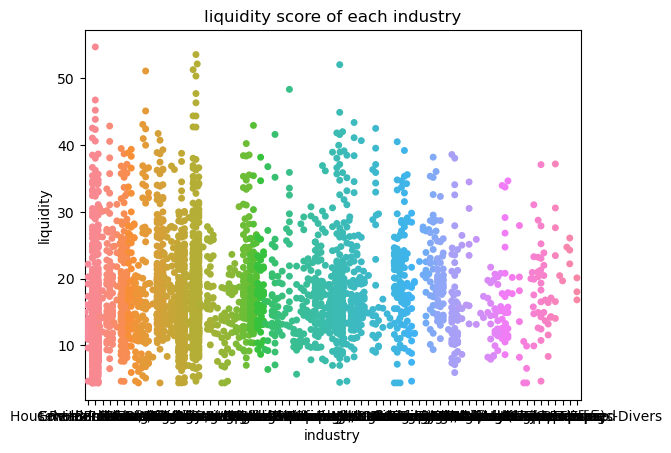

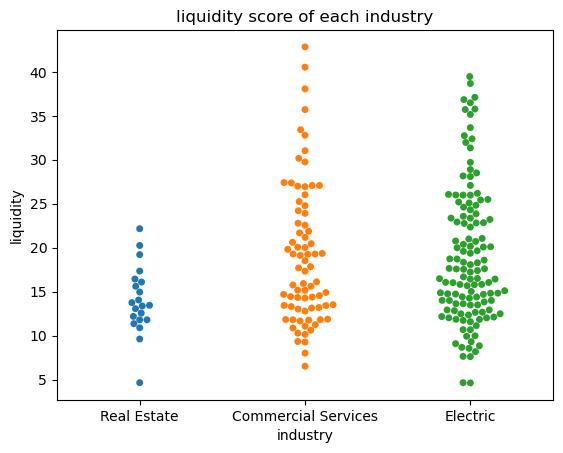

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


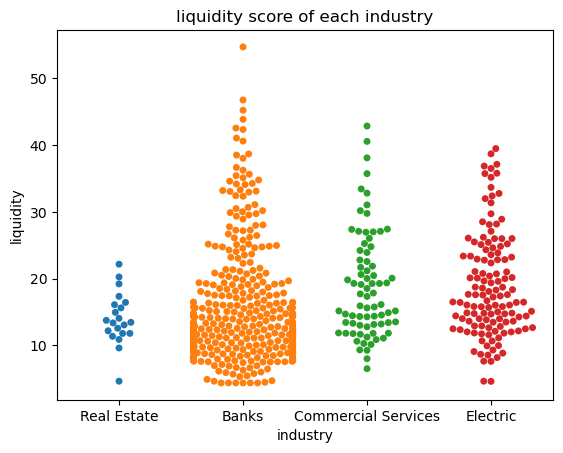

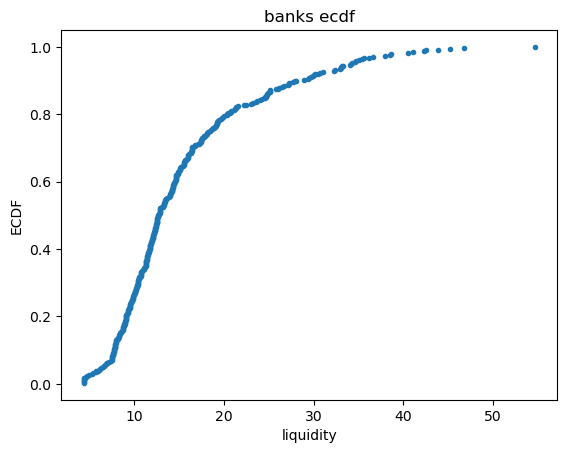

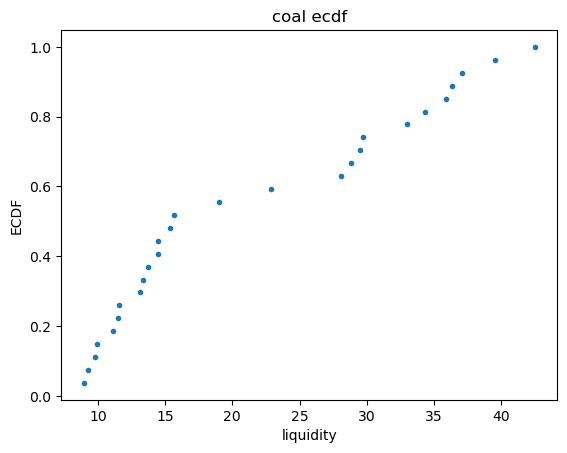

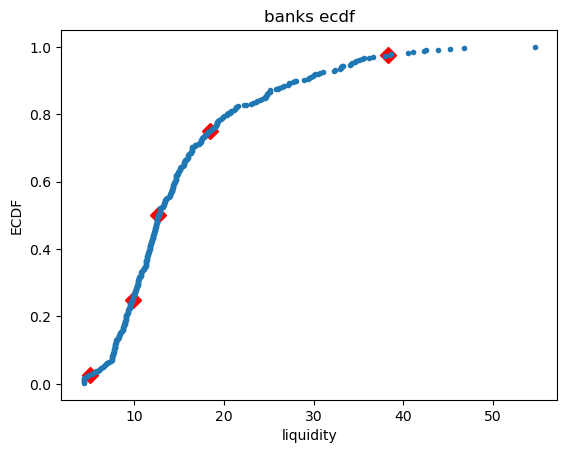

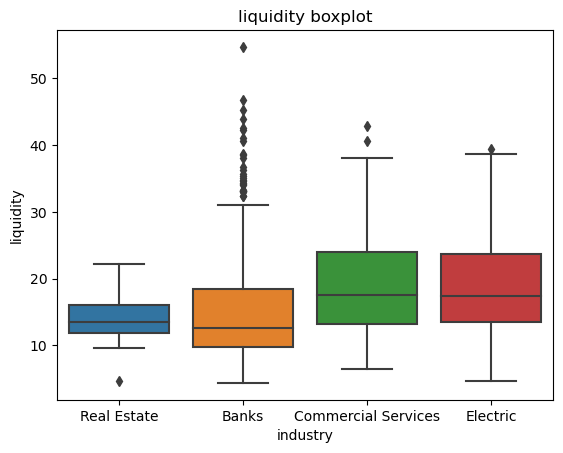

sample size of banks_liquidity is 380
sample size of coal_liquidity is 27
stds are 8.55 and 10.91 for banks and coal, so coal liquidity is more spread out.

I believe greater liquidity stands more greater number of trades of that bond.

I would find the correlation coefficient to check my hypothesis.

the correlation coefficient of 0.72 proves my hypothesis positive, there is a strong linear relationship between these 2 variables.

the corrcoef close to 0.8 for coal liquidity, again proves my hypothesis.

I think my hypothesis applies not only to coal and banks, but to all industries.

0.67+, I was right

My name is Youshi Wang
My NetID is: youshiw2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 12 15:31:39 2023

@author: Jerry
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('HY_Universe_corporate bond.csv')
n_rows, n_cols = df.shape

#%% Try to find some relationship between industry and liquidity score
df=df.rename(columns={'LiquidityScore':'liquidity','Industry':'industry'})    #rename this column for easier calling
data=df['liquidity']

#let's see what beeswarm plot tells us
sns.swarmplot(x='industry',y='liquidity',data=df)
plt.xlabel('industry')
plt.ylabel('liquidity')
plt.title('liquidity score of each industry')
plt.show()
#this visualization is poor, since there are too many classes.

#select only 3 industries for analysis
subset=df.loc[df['industry'].isin(['Real Estate', 'Commercial Services', 'Electric'])]
sns.swarmplot(x='industry',y='liquidity',data=subset)
plt.xlabel('industry')
plt.ylabel('liquidity')
plt.title('liquidity score of each industry')
plt.show()
#now the visualization gets much better
#we can easily tell that bonds of Real Estate industry have lower liquidity cap than other 2
#however, it does seem that a good chunk of bonds for all 3 industries fall between 10-20 liquidity

#I would like to add another industry: Banks, because I think banks are very liquid in nature
subset_1=df.loc[df['industry'].isin(['Real Estate', 'Commercial Services', 'Electric','Banks'])]
sns.swarmplot(x='industry',y='liquidity',data=subset_1)
plt.xlabel('industry')
plt.ylabel('liquidity')
plt.title('liquidity score of each industry')
plt.show()
#well I am somewhat right, banks have higher liquidity cap: there is one with above 50.
#but still the majority fall below 25

#%% Now I am interested in the cumulative distribution of bond liquidity of banks

import statsmodels.api as sm


banks_liquidity = df.loc[df['industry'] == 'Banks', 'liquidity']
ecdf_1=sm.distributions.ECDF(banks_liquidity)
x_banks=ecdf_1.x
y_banks=ecdf_1.y
plt.plot(x_banks, y_banks, marker='.', linestyle='none')
plt.xlabel('liquidity')
plt.ylabel('ECDF')
plt.title('banks ecdf')
plt.show()
#the ecdf plot tell us that indeed most (about 80%) bonds on banks have liquidity below 20

#what about coal industry?
coal_liquidity = df.loc[df['industry'] == 'Coal', 'liquidity']
ecdf_2=sm.distributions.ECDF(coal_liquidity)
x_coal=ecdf_2.x
y_coal=ecdf_2.y
plt.plot(x_coal, y_coal, marker='.', linestyle='none')
plt.xlabel('liquidity')
plt.ylabel('ECDF')
plt.title('coal ecdf')
plt.show()
#seems like there aren't as many samples in Coal industry as in banks industry since dotts are splitting
#unlike those of banks, about 40% bonds of coal industry have liquidity above 20

#add percentiles to banks ecdf for breakpoints that are more precise
percentiles = np.array([2.5, 25, 50, 75, 97.5])
p_banks = np.percentile(banks_liquidity, percentiles)
plt.plot(p_banks, percentiles/100, marker='D', markersize=8, color='red', linestyle='none')
plt.plot(x_banks, y_banks, marker='.', linestyle='none')
plt.xlabel('liquidity')
plt.ylabel('ECDF')
plt.title('banks ecdf')
plt.show()

#%% boxplot is suitable for large dataset, it also gives good comparison for distribution of each dataset

sns.boxplot(x='industry',y='liquidity',data=subset_1)
plt.xlabel('industry')
plt.ylabel('liquidity')
plt.title('liquidity boxplot')
plt.show()
#I initially believed that banks have higher liquidity score than Commercial services and Electric in general.
#this boxplot proves otherwise: in fact most bonds of banks have liquidity in a range lower than those of the other 2 industries.
#I was only right that samples of banks in end-distribution have greater value. (greater outliers)

#%% compute and compare quantitative properties of 2 industries.

#sort liquidityscores ascending
print('sample size of banks_liquidity is ' + str(len(banks_liquidity)))
print('sample size of coal_liquidity is ' + str(len(coal_liquidity)))

#banks has 380 samples, while coal has only 27. So boxplot might not be very suitable for coal.

#find variance and std
var_banks = np.var(banks_liquidity)
std_banks = np.std(banks_liquidity)
var_coal = np.var(coal_liquidity)
std_coal = np.std(coal_liquidity)
print('stds are 8.55 and 10.91 for banks and coal, so coal liquidity is more spread out.')
print()
print('I believe greater liquidity stands more greater number of trades of that bond.')
print()
print('I would find the correlation coefficient to check my hypothesis.')
banks_ntrade = df.loc[df['industry'] == 'Banks', 'weekly_mean_ntrades']
coal_ntrade = df.loc[df['industry'] == 'Coal', 'weekly_mean_ntrades']
print()
corr_banks = np.corrcoef(banks_liquidity,banks_ntrade)
corr_banks[0,1]
print('the correlation coefficient of 0.72 proves my hypothesis positive, there is a strong linear relationship between these 2 variables.')
print()
corr_coal = np.corrcoef(coal_liquidity,coal_ntrade)
corr_coal[0,1]
print('the corrcoef close to 0.8 for coal liquidity, again proves my hypothesis.')
print()
print('I think my hypothesis applies not only to coal and banks, but to all industries.')
print()
liquidity=df['liquidity']
ntrade=df['weekly_mean_ntrades']
corr=np.corrcoef(liquidity,ntrade)
corr[0,1]
print('0.67+, I was right')
print()
#%%
print("My name is Youshi Wang")
print("My NetID is: youshiw2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")













